In [ ]:
#need to install geopandas package

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
df = pd.read_csv("Downloads/sites_spring.csv") #camera_sites,locations

In [4]:
animal_df = pd.read_csv("Downloads/camera_results.csv") #camera_results

In [5]:
record_cols = ['Begin_Time','Species_Name','Common_Name','Actual_Lat','Actual_Lon']

In [6]:
animal_df.columns = record_cols

In [7]:
df.dropna(subset=['Actual_Lat','Actual_Lon'],inplace = True)

In [ ]:
#county map from king county open database

In [9]:
county_map = gpd.read_file("Downloads/zipcode_boundaries/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp")

In [13]:
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Actual_Lat,df.Actual_Lon))

In [14]:
print(geo_df.head())

                       Location  Actual_Lat  Actual_Lon  \
0  Burke-Gilman Playground Park    47.66616  -122.28327   
2            David Rodgers Park    47.64354  -122.36046   
4                Discovery Park    47.65980  -122.41942   
6             Duvall Open Space    47.74577  -121.96749   
8             Foster Golf Links    47.48434  -122.26262   

                  geometry  
0  POINT (47.666 -122.283)  
2  POINT (47.644 -122.360)  
4  POINT (47.660 -122.419)  
6  POINT (47.746 -121.967)  
8  POINT (47.484 -122.263)  


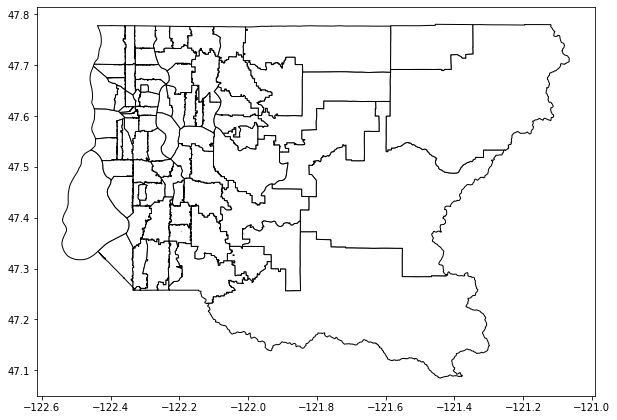

In [16]:
ax = county_map[county_map.COUNTY=='033'].plot(color='white',edgecolor='black',figsize=(10,10))

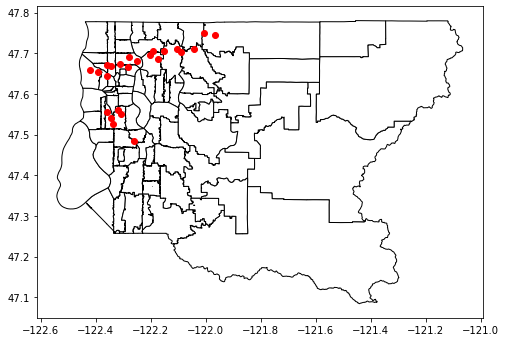

In [17]:
county_map[county_map.COUNTY=='033'].plot(color='white',edgecolor='black',figsize=(8,8))
plt.scatter(y=geo_df['Actual_Lat'],x=geo_df['Actual_Lon'],c='red')


In [19]:
geo_animal_df = gpd.GeoDataFrame(animal_df, geometry=gpd.points_from_xy(animal_df.Actual_Lat,animal_df.Actual_Lon))


<AxesSubplot:>

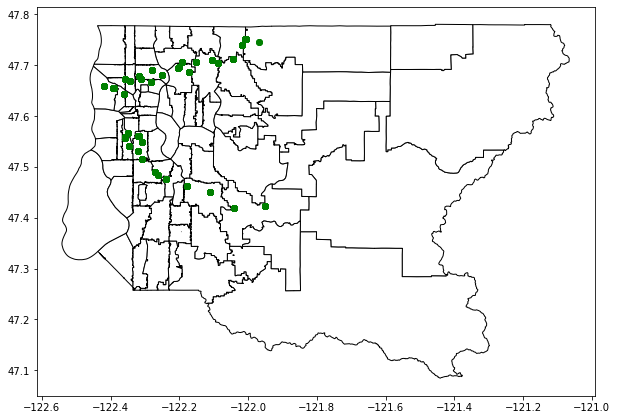

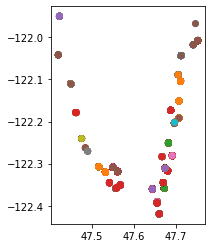

In [20]:
county_map[county_map.COUNTY=='033'].plot(color='white',edgecolor='black',figsize=(10,10))
plt.scatter(y=geo_animal_df['Actual_Lat'],x=geo_animal_df['Actual_Lon'],c='green')
geo_animal_df.plot(column='Common_Name')

In [21]:
geo_df.geometry.nunique() #camera sites

24

In [22]:
geo_animal_df.geometry.nunique() #camera trap data location

48

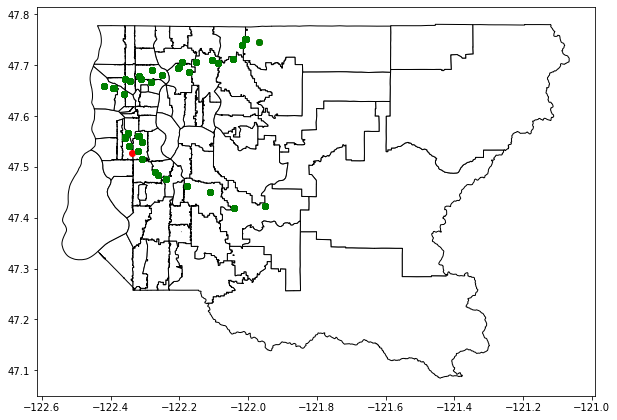

In [23]:
county_map[county_map.COUNTY=='033'].plot(color='white',edgecolor='black',figsize=(10,10))
plt.scatter(y=geo_df['Actual_Lat'],x=geo_df['Actual_Lon'],c='red')
plt.scatter(y=geo_animal_df['Actual_Lat'],x=geo_animal_df['Actual_Lon'],c='green')

